In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import accuracy_score

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [9]:
# Normalize pixel values to the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the input data
X_train = X_train.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))

In [10]:
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 3s 3ms/step - loss: 0.3344 - accuracy: 0.9067 - val_loss: 0.1853 - val_accuracy: 0.9488
Epoch 2/5
750/750 [==============================] - 2s 3ms/step - loss: 0.1551 - accuracy: 0.9546 - val_loss: 0.1337 - val_accuracy: 0.9615
Epoch 3/5
750/750 [==============================] - 2s 3ms/step - loss: 0.1081 - accuracy: 0.9685 - val_loss: 0.1119 - val_accuracy: 0.9668
Epoch 4/5
750/750 [==============================] - 2s 3ms/step - loss: 0.0836 - accuracy: 0.9758 - val_loss: 0.1010 - val_accuracy: 0.9701
Epoch 5/5
750/750 [==============================] - 2s 3ms/step - loss: 0.0660 - accuracy: 0.9807 - val_loss: 0.0936 - val_accuracy: 0.9723


In [12]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

313/313 [==============================] - 1s 1ms/step
Accuracy: 0.97


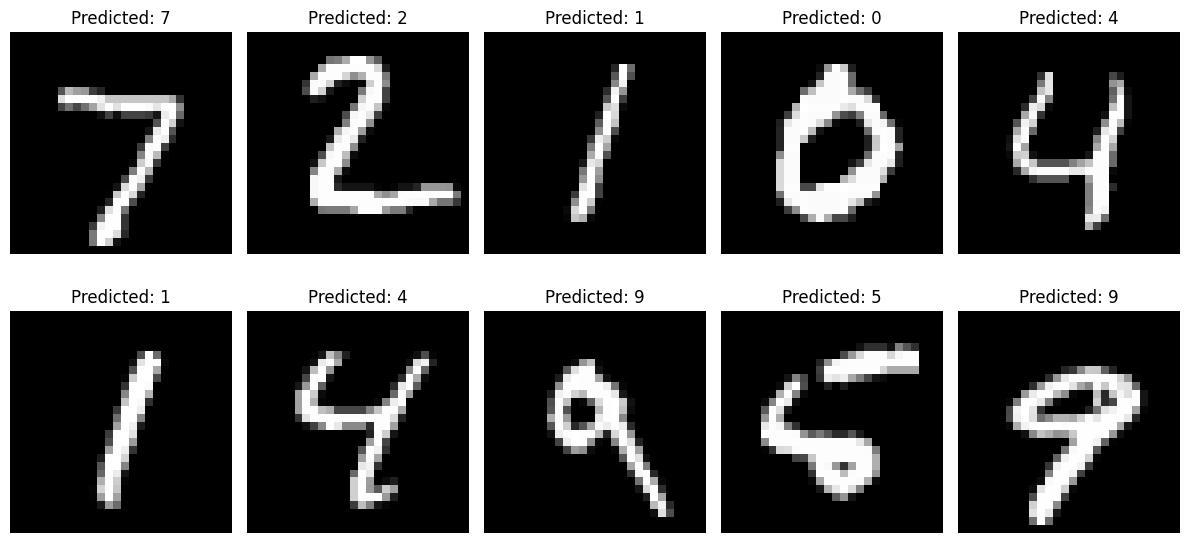

In [13]:
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {y_pred[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()